In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
import numpy as np
warnings.filterwarnings('ignore')

# Load the data into a Pandas dataframe
df = pd.read_csv("ef_brazil_cetesb_db.csv")

In [28]:
df.head()

,calendar_year,model_year,pollutant,ef,ef_plus_c,log_ef
0,2020,2020,CH4,0.080778,1.080778,0.077681
1,2020,2019,CH4,0.080778,1.080778,0.077681
2,2020,2018,CH4,0.058193,1.058193,0.056563
3,2020,2017,CH4,0.091306,1.091306,0.087375
4,2020,2016,CH4,0.075578,1.075578,0.072858


In [29]:
df.shape

(793, 6)

In [17]:
# Drop the columns
df = df.drop(columns=["Proconve_HDV", "Euro_EqHDV","BUS_URBAN_D","BUS_MICRO_D","BUS_COACH_D","BUS_ARTIC_D"])

In [18]:
df.head()

,calendar_year,model_year,pollutant,ef
0,2020,2020,CH4,0.080778
1,2020,2019,CH4,0.080778
2,2020,2018,CH4,0.058193
3,2020,2017,CH4,0.091306
4,2020,2016,CH4,0.075578


In [30]:
df.describe()

,calendar_year,model_year,ef,ef_plus_c,log_ef
count,793.0,793.000000,793.000000,793.000000,793.000000
mean,2020.0,1990.000000,467.737827,468.737827,2.600074
std,0.0,17.617929,1231.792313,1231.792313,2.524446
min,2020.0,1960.000000,0.012389,1.012389,0.012313
25%,2020.0,1975.000000,1.354501,2.354501,0.856329
50%,2020.0,1990.000000,5.249332,6.249332,1.832475
75%,2020.0,2005.000000,45.302095,46.302095,3.835187
max,2020.0,2020.000000,4792.753194,4793.753194,8.475069


In [19]:
c = 1

# Add the constant value to the ef column
df['ef_plus_c'] = df['ef'] + c

# Apply the natural logarithm function to the ef_plus_c column
df['log_ef'] = np.log(df['ef_plus_c'])
df.head()

,calendar_year,model_year,pollutant,ef,ef_plus_c,log_ef
0,2020,2020,CH4,0.080778,1.080778,0.077681
1,2020,2019,CH4,0.080778,1.080778,0.077681
2,2020,2018,CH4,0.058193,1.058193,0.056563
3,2020,2017,CH4,0.091306,1.091306,0.087375
4,2020,2016,CH4,0.075578,1.075578,0.072858


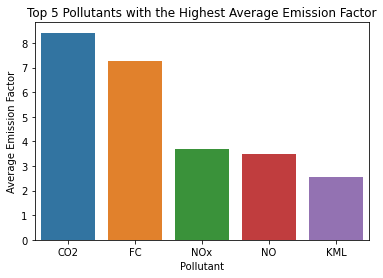

In [20]:
# Calculate average ef for each pollutant and sort by descending order
avg_ef_by_pollutant = df.groupby('pollutant')['log_ef'].mean().sort_values(ascending=False)

# Slice the top 5 pollutants
top_pollutants = avg_ef_by_pollutant.head(5)

# Create a bar plot of the top 5 average ef values
sns.barplot(x=top_pollutants.index, y=top_pollutants.values)

# Add labels and title
plt.xlabel('Pollutant')
plt.ylabel('Average Emission Factor')
plt.title('Top 5 Pollutants with the Highest Average Emission Factor')

# Show the plot
plt.show()


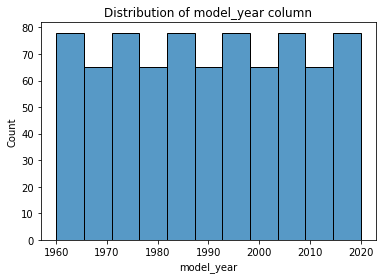

In [21]:
# Distribution of model_year column
sns.histplot(df, x="model_year")
plt.title("Distribution of model_year column")
plt.show()

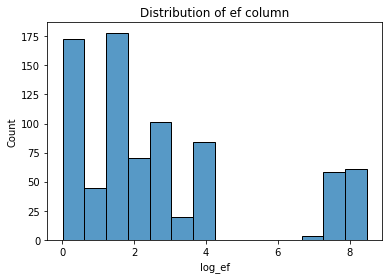

In [22]:
# Distribution of ef column
sns.histplot(df, x="log_ef")
plt.title("Distribution of ef column")
plt.show()

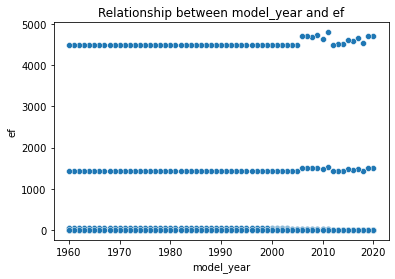

In [23]:
# Relationship between model_year and ef
sns.scatterplot(data=df, x="model_year", y="ef")
plt.title("Relationship between model_year and ef")
plt.show()

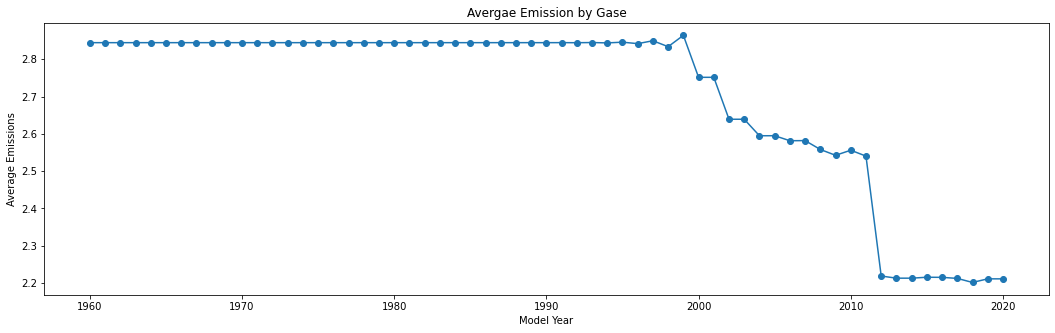

In [13]:
# Group the data by reference year and calculate the average emissions for each year
reference_years = df.groupby('model_year').mean()['log_ef']
plt.figure(figsize = (18,5))
# Plot a line chart of the reference year trend
plt.plot(reference_years.index, reference_years.values, '-o')
plt.xlabel('Model Year')
plt.ylabel('Average Emissions')
plt.title('Avergae Emission by Gases')
plt.show()